# FINAL PROJECT 

## GROUP: EPOCH ELITES :)

Members:
    
    - Sharmi Das
    - Sajib (RYHAN) Suny
    - Shalini Ivaturi
    - Siddhartha Chowdhury

# DATASET

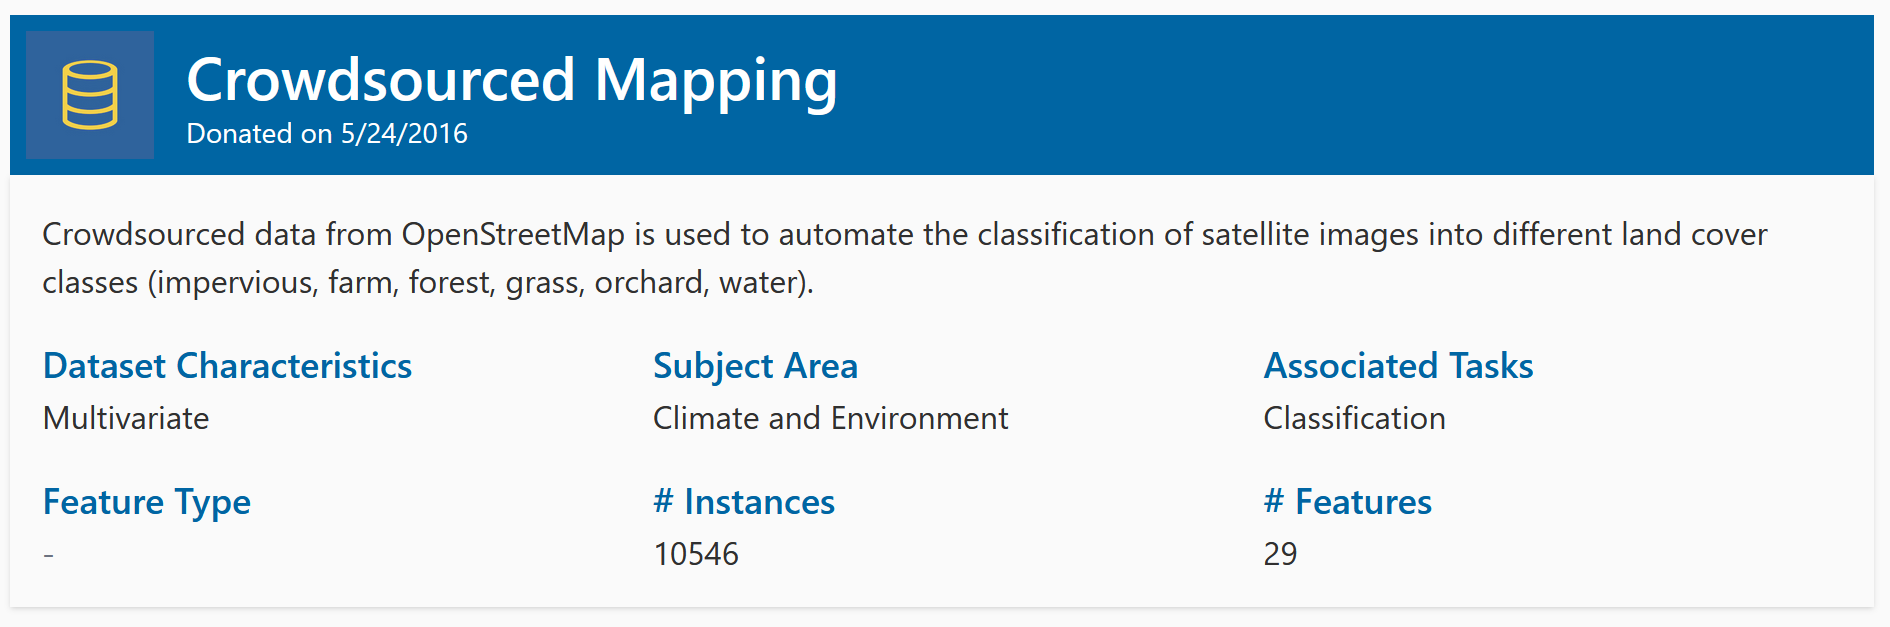


### Source: https://archive.ics.uci.edu/dataset/400/crowdsourced+mapping

class: The land cover class (impervious, farm, forest, grass, orchard, water) [note: this is the target variable to classify].

max_ndvi: the maximum NDVI (normalized difference vegetation index) value derived from the time-series of satellite images.

20150720_N - 20140101_N : NDVI values extracted from satellite images acquired between January 2014 and July 2015, in reverse chronological order (dates given in the format yyyymmdd).


## Import Libraries

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans



## Load Data

In [36]:
# Load the dataset
df = pd.read_csv('Crowd.csv')

In [37]:
# Display basic information about the dataset
print("Data Overview:")
print("---------------")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")
print("\nData Types:")
print("---------------")
print(df.dtypes)


Data Overview:
---------------
Number of rows: 10545
Number of columns: 29

Data Types:
---------------
class          object
max_ndvi      float64
20150720_N    float64
20150602_N    float64
20150517_N    float64
20150501_N    float64
20150415_N    float64
20150330_N    float64
20150314_N    float64
20150226_N    float64
20150210_N    float64
20150125_N    float64
20150109_N    float64
20141117_N    float64
20141101_N    float64
20141016_N    float64
20140930_N    float64
20140813_N    float64
20140626_N    float64
20140610_N    float64
20140525_N    float64
20140509_N    float64
20140423_N    float64
20140407_N    float64
20140322_N    float64
20140218_N    float64
20140202_N    float64
20140117_N    float64
20140101_N    float64
dtype: object


## EDA

In [38]:
print("\nSummary Statistics:")
print("---------------")
print(df.describe())



Summary Statistics:
---------------
           max_ndvi    20150720_N    20150602_N    20150517_N    20150501_N  \
count  10545.000000  10545.000000  10545.000000  10545.000000  10545.000000   
mean    7282.721268   5713.832981   4777.434284   4352.914883   5077.372030   
std     1603.782784   2283.945491   2735.244614   2870.619613   2512.162084   
min      563.444000   -433.735000  -1781.790000  -2939.740000  -3536.540000   
25%     7285.310000   4027.570000   2060.600000   1446.940000   2984.370000   
50%     7886.260000   6737.730000   5270.020000   4394.340000   5584.070000   
75%     8121.780000   7589.020000   7484.110000   7317.950000   7440.210000   
max     8650.500000   8377.720000   8566.420000   8650.500000   8516.100000   

         20150415_N    20150330_N    20150314_N    20150226_N    20150210_N  \
count  10545.000000  10545.000000  10545.000000  10545.000000  10545.000000   
mean    2871.423540   4898.348680   3338.303406   4902.600296   4249.307925   
std     2675.0

In [39]:
print("\nMissing Values:")
print("---------------")
print(df.isnull().sum())



Missing Values:
---------------
class         0
max_ndvi      0
20150720_N    0
20150602_N    0
20150517_N    0
20150501_N    0
20150415_N    0
20150330_N    0
20150314_N    0
20150226_N    0
20150210_N    0
20150125_N    0
20150109_N    0
20141117_N    0
20141101_N    0
20141016_N    0
20140930_N    0
20140813_N    0
20140626_N    0
20140610_N    0
20140525_N    0
20140509_N    0
20140423_N    0
20140407_N    0
20140322_N    0
20140218_N    0
20140202_N    0
20140117_N    0
20140101_N    0
dtype: int64


In [40]:

# Display a few rows of the dataset
print("\nSample Data:")
print("---------------")
print(df.head())


Sample Data:
---------------
   class  max_ndvi  20150720_N  20150602_N  20150517_N  20150501_N  \
0  water   997.904    637.5950     658.668   -1882.030    -1924.36   
1  water   914.198    634.2400     593.705   -1625.790    -1672.32   
2  water  3800.810   1671.3400    1206.880     449.735     1071.21   
3  water   952.178     58.0174   -1599.160     210.714    -1052.63   
4  water  1232.120     72.5180   -1220.880     380.436    -1256.93   

   20150415_N  20150330_N  20150314_N  20150226_N  ...  20140610_N  \
0     997.904   -1739.990     630.087   -1628.240  ...    -921.193   
1     914.198    -692.386     707.626   -1670.590  ...    -954.719   
2     546.371    1077.840     214.564     849.599  ...    1562.210   
3     578.807   -1564.630    -858.390     729.790  ...   -1025.880   
4     515.805   -1413.180    -802.942     683.254  ...   -1813.950   

   20140525_N  20140509_N  20140423_N  20140407_N  20140322_N  20140218_N  \
0   -1043.160   -1942.490     267.138     366.608  

/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


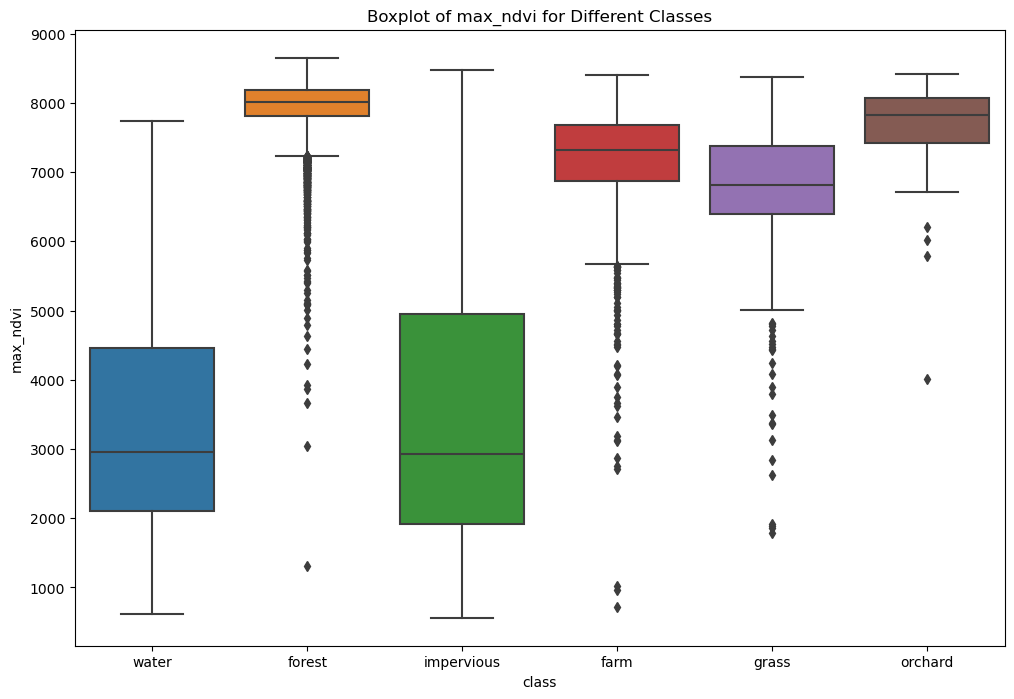

In [41]:
# Plot boxplot
plt.figure(figsize=(12, 8))
sns.boxplot(x='class', y='max_ndvi', data=df)
plt.title('Boxplot of max_ndvi for Different Classes')
plt.show()


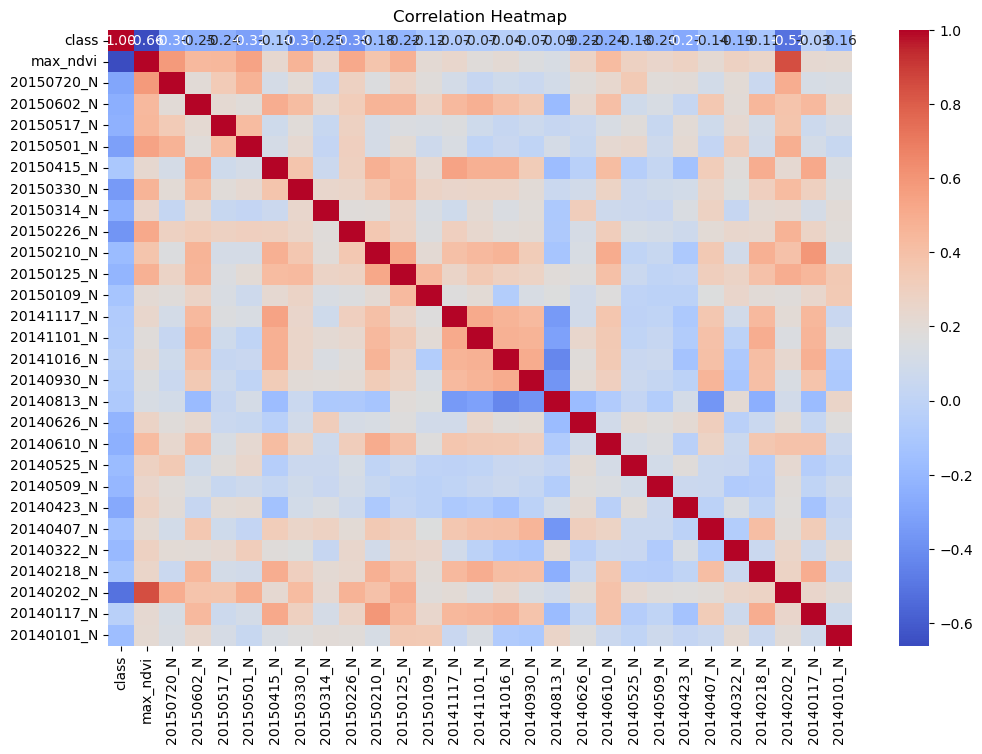

In [42]:
from sklearn.preprocessing import LabelEncoder

# Create a copy of the DataFrame
df_encoded = df.copy()

# Instantiate LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'class' column
df_encoded['class'] = label_encoder.fit_transform(df['class'])

# Plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


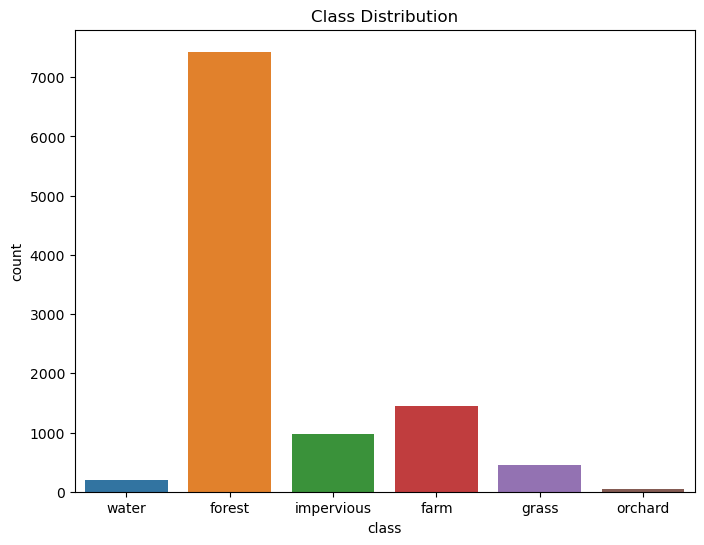

In [43]:
# Plot class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()

# UNSUPERVISED LEARNING

In [44]:
!pip install --upgrade scikit-learn
!pip install --upgrade threadpoolctl
!pip install --upgrade numpy

/var/folders/20/g3kpbwhd1sd3gwq9d2zdcf5r0000gn/T/ipykernel_70078/337148442.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['class'] = pd.Categorical(X['class'])
/var/folders/20/g3kpbwhd1sd3gwq9d2zdcf5r0000gn/T/ipykernel_70078/337148442.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['class'] = X['class'].cat.codes
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the valu

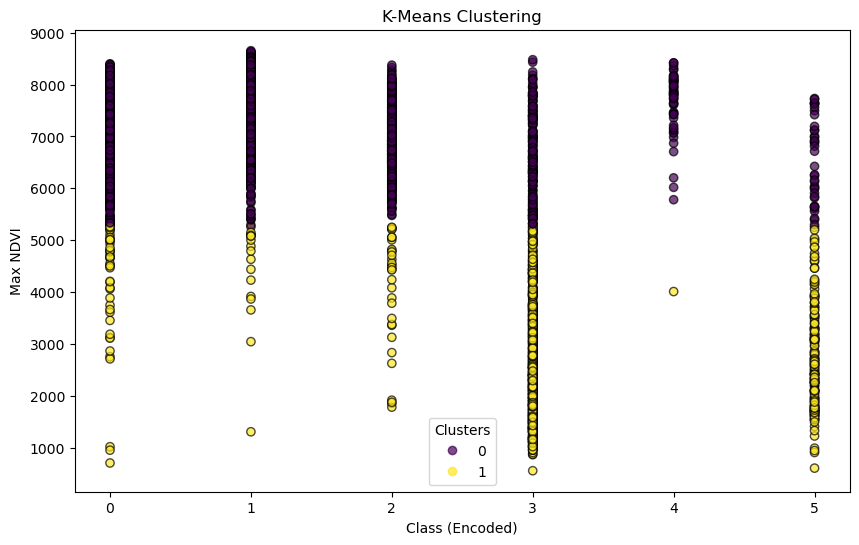

In [45]:
# Selecting relevant columns for clustering
X = df[['class', 'max_ndvi']]

# Convert categorical variable 'class' to numerical values using label encoding
X['class'] = pd.Categorical(X['class'])
X['class'] = X['class'].cat.codes

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
X['cluster'] = kmeans.fit_predict(X[['class', 'max_ndvi']])

# Visualize the clusters
plt.figure(figsize=(10, 6))

# Scatter plot for class vs max_ndvi with color-coded clusters
scatter = plt.scatter(X['class'], X['max_ndvi'], c=X['cluster'], cmap='viridis', alpha=0.7, edgecolors='k')

# Add labels and legend
plt.title('K-Means Clustering')
plt.xlabel('Class (Encoded)')
plt.ylabel('Max NDVI')
plt.legend(*scatter.legend_elements(), title='Clusters')

# Show the plot
plt.show()

In [46]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(X[['class', 'max_ndvi']], X['cluster'])
print(f"Silhouette Score: {silhouette_avg}")


Silhouette Score: 0.8535518902080583


# SUPERVISED LEARNING

In [47]:
#Separate features (X) and target variable (y)
X = df.drop(['class'], axis=1)  # Assuming 'class' is the target variable
y = df['class']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [48]:

# Assuming you have X and y as your features and target variable
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a base classifier (you can replace this with any classifier of your choice)
base_classifier = DecisionTreeClassifier(random_state=42)

# Create a BaggingClassifier
bagging_clf = BaggingClassifier(base_classifier, n_estimators=50, random_state=42)

# Fit the BaggingClassifier on the training data
bagging_clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = bagging_clf.predict(X_test)

# Evaluate the performance
b_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {b_accuracy}')


Accuracy: 0.9378852536747273


In [49]:
#Separate features (X) and target variable (y)
X = df.drop(['class'], axis=1)  # Assuming 'class' is the target variable
y = df['class']
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Create a Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust the number of estimators



In [50]:
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Oversample the minority class to address class imbalance
oversampler = RandomOverSampler(sampling_strategy='minority')
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)


In [51]:
# Train the classifier
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [52]:
# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
r_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {r_accuracy}')


Accuracy: 0.9416785206258891


In [53]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming y_test and y_pred are your target values
# Evaluate accuracy
r_accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {r_accuracy}')

# Display classification report
print('Classification Report:')
print(classification_report(y_test, y_pred))

# Display confusion matrix
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9416785206258891
Classification Report:
              precision    recall  f1-score   support

        farm       0.87      0.85      0.86       268
      forest       0.96      0.99      0.97      1506
       grass       0.90      0.74      0.81        85
  impervious       0.90      0.84      0.87       202
     orchard       1.00      0.18      0.31        11
       water       1.00      0.81      0.90        37

    accuracy                           0.94      2109
   macro avg       0.94      0.74      0.79      2109
weighted avg       0.94      0.94      0.94      2109

Confusion Matrix:
[[ 228   33    0    7    0    0]
 [   7 1493    2    4    0    0]
 [   4   13   63    5    0    0]
 [  18   10    4  170    0    0]
 [   2    7    0    0    2    0]
 [   2    2    1    2    0   30]]


In [54]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import xgboost as xgb
from sklearn.metrics import accuracy_score


# Encode the target variable using LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)

# Convert the dataset into DMatrix format (optimized for XGBoost)
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=label_encoder.transform(y_test))

# Define hyperparameters
params = {
    'objective': 'multi:softmax',  # For multiclass classification
    'num_class': len(label_encoder.classes_),  # Number of classes
    'eval_metric': 'merror',  # Classification error metric
    'use_label_encoder': False  # To avoid XGBoost's native label encoding
}

# Train the XGBoost model
num_rounds = 100
xgb_model = xgb.train(params, dtrain, num_rounds)

# Make predictions on the test set
y_pred = xgb_model.predict(dtest)

# Convert numeric predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred.astype(int))

# Evaluate the model
x_accuracy = accuracy_score(y_test, y_pred_original)
print(f'Accuracy on Test Dataset: {x_accuracy}')


/Users/sharmidas/anaconda3/lib/python3.11/site-packages/xgboost/core.py:160: UserWarning: [13:02:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:742: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy on Test Dataset: 0.9634898055950688


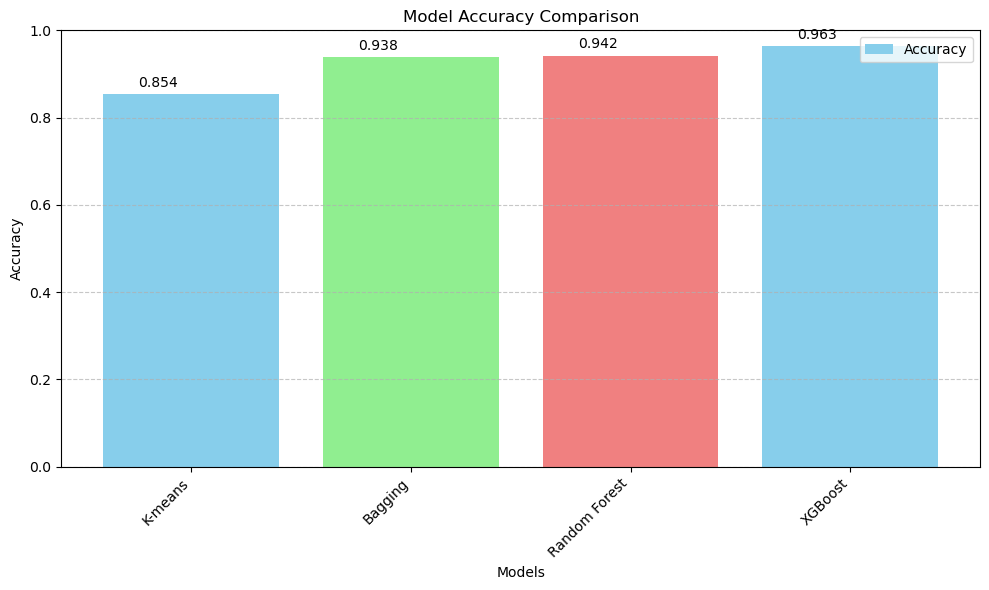

In [55]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have the accuracy values for each model
model_names = ['K-means','Bagging', 'Random Forest', 'XGBoost']
accuracy_values = [silhouette_avg,b_accuracy, r_accuracy, x_accuracy]

# Create a color palette for better visualization
colors = ['skyblue', 'lightgreen', 'lightcoral']

# Create a bar plot with annotations
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracy_values, color=colors)

# Add data values on top of the bars
for bar, value in zip(bars, accuracy_values):
    plt.text(bar.get_x() + bar.get_width() / 2 - 0.15, bar.get_height() + 0.01, f'{value:.3f}', ha='center', va='bottom', fontsize=10)

# Enhance chart aesthetics
plt.ylim(0, 1)  # Set the y-axis limit based on your accuracy range (0 to 1)
plt.title('Model Accuracy Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45, ha='right')

# Add legend
plt.legend(['Accuracy'], loc='upper right')

# Show the plot
plt.tight_layout()
plt.show()


# FEATURE REDUCTION BASED ON IMPORTANCE

In [62]:
print(len(rf_feature_importance))
print(len(feature_names))


28
29


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]),
 [Text(0, 0, 'max_ndvi'),
  Text(1, 0, '20150720_N'),
  Text(2, 0, '20150602_N'),
  Text(3, 0, '20150517_N'),
  Text(4, 0, '20150501_N'),
  Text(5, 0, '20150415_N'),
  Text(6, 0, '20150330_N'),
  Text(7, 0, '20150314_N'),
  Text(8, 0, '20150226_N'),
  Text(9, 0, '20150210_N'),
  Text(10, 0, '20150125_N'),
  Text(11, 0, '20150109_N'),
  Text(12, 0, '20141117_N'),
  Text(13, 0, '20141101_N'),
  Text(14, 0, '20141016_N'),
  Text(15, 0, '20140930_N'),
  Text(16, 0, '20140813_N'),
  Text(17, 0, '20140626_N'),
  Text(18, 0, '20140610_N'),
  Text(19, 0, '20140525_N'),
  Text(20, 0, '20140509_N'),
  Text(21, 0, '20140423_N'),
  Text(22, 0, '20140407_N'),
  Text(23, 0, '20140322_N'),
  Text(24, 0, '20140218_N'),
  Text(25, 0, '20140202_N'),
  Text(26, 0, '20140117_N'),
  Text(27, 0, '20140101_N')])

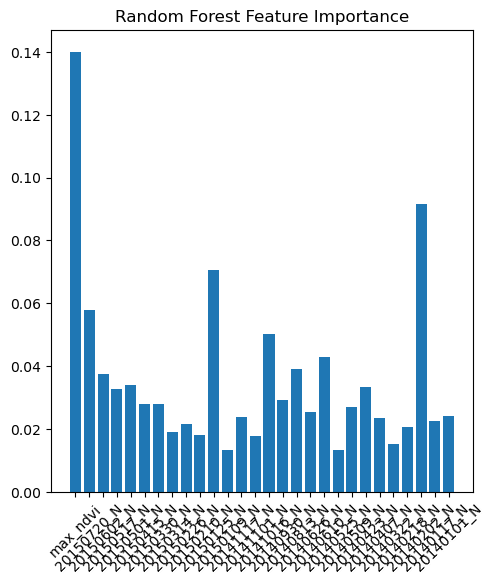

In [65]:
# Assuming the first column contains the target variable (feature to be removed)
target_variable = df.columns[0]

# Drop the first column
df_without_first_feature = df.drop(columns=[target_variable])

# Get feature importance from Random Forest
rf_feature_importance = clf.feature_importances_

# Plot Random Forest feature importance
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.bar(range(len(rf_feature_importance)), rf_feature_importance, tick_label=df_without_first_feature.columns)
plt.title('Random Forest Feature Importance')
plt.xticks(rotation=45)



In [69]:
# Find the index of the feature with the lowest importance
lowest_importance_index = rf_feature_importance.argmin()

# Print the lowest feature importance and corresponding feature name
lowest_importance = rf_feature_importance[lowest_importance_index]
lowest_feature_name = df_without_first_feature.columns[lowest_importance_index]
print(f"Lowest Feature Importance: {lowest_importance} for Feature: {lowest_feature_name}")

Lowest Feature Importance: 0.0132268091292374 for Feature: 20150109_N


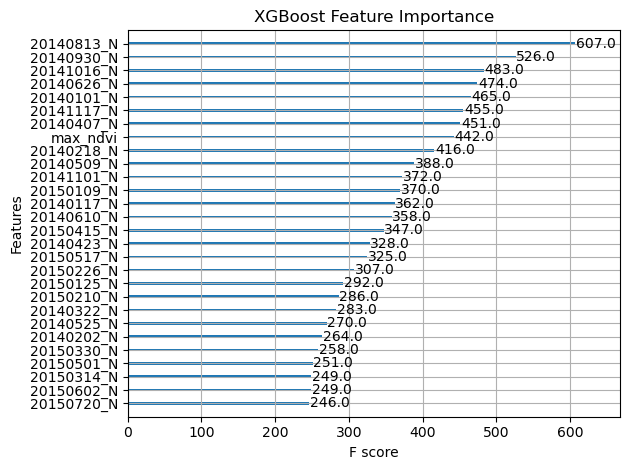

In [68]:
# Plot XGBoost feature importance
xgb.plot_importance(xgb_model)  # Use XGBoost's plot_importance function
plt.title('XGBoost Feature Importance')

plt.tight_layout()
plt.show()


In [71]:
# Get XGBoost feature importance using get_fscore()
xgb_feature_importance = xgb_model.get_fscore()

# Convert feature importance dictionary to a Pandas DataFrame
xgb_feature_importance_df = pd.DataFrame(list(xgb_feature_importance.items()), columns=['Feature', 'Importance'])

# Find the row with the lowest importance
lowest_importance_row_xgb = xgb_feature_importance_df['Importance'].idxmin()

# Print the lowest feature importance and corresponding feature name for XGBoost
lowest_importance_xgb = xgb_feature_importance_df.loc[lowest_importance_row_xgb, 'Importance']
lowest_feature_name_xgb = xgb_feature_importance_df.loc[lowest_importance_row_xgb, 'Feature']
print(f"Lowest Feature Importance (XGBoost): {lowest_importance_xgb} for Feature: {lowest_feature_name_xgb}")

Lowest Feature Importance (XGBoost): 246.0 for Feature: 20150720_N


Let's try to train the models with dropping these features

In [72]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

# Assuming '20150109_N' is the least important feature
feature_to_remove = '20150109_N'

# Remove the least important feature from the DataFrame
df_removed_feature = df.drop(columns=[feature_to_remove])

# Modified dataset (without the least important feature)
X_removed_feature = df_removed_feature.drop(columns=[target_variable])
y_removed_feature = df_removed_feature[target_variable]


original_scores = cross_val_score(clf, X, y, cv=5, scoring='accuracy')
print("Original Model Cross-Validation Accuracy: {:.4f} (+/- {:.4f})".format(original_scores.mean(), original_scores.std() * 2))


Original Model Cross-Validation Accuracy: 0.9172 (+/- 0.0493)


In [73]:
# Train and evaluate the model on the modified dataset
model_removed_feature = RandomForestClassifier(n_estimators=100, random_state=42)
removed_feature_scores = cross_val_score(model_removed_feature, X_removed_feature, y_removed_feature, cv=5, scoring='accuracy')
print("Model without Least Important Feature Cross-Validation Accuracy: {:.4f} (+/- {:.4f})".format(removed_feature_scores.mean(), removed_feature_scores.std() * 2))


Model without Least Important Feature Cross-Validation Accuracy: 0.9167 (+/- 0.0469)


In [83]:
# Modify the metrics as per your specific requirements
original_predictions = cross_val_predict(clf, X, y, cv=5)
removed_feature_predictions = cross_val_predict(model_removed_feature, X_removed_feature, y_removed_feature, cv=5)

print("\nOriginal Model Metrics:")
print("Accuracy: {:.4f}".format(accuracy_score(y, original_predictions)))
print("Precision: {:.4f}".format(precision_score(y, original_predictions, average='weighted')))
print("Recall: {:.4f}".format(recall_score(y, original_predictions, average='weighted')))

print("\nModel without Least Important Feature Metrics:")
print("Accuracy: {:.4f}".format(accuracy_score(y_removed_feature, removed_feature_predictions)))
print("Precision: {:.4f}".format(precision_score(y_removed_feature, removed_feature_predictions, average='weighted')))
print("Recall: {:.4f}".format(recall_score(y_removed_feature, removed_feature_predictions, average='weighted')))



Original Model Metrics:
Accuracy: 0.9172
Precision: 0.9107
Recall: 0.9172

Model without Least Important Feature Metrics:
Accuracy: 0.9167
Precision: 0.9102
Recall: 0.9167


/Users/sharmidas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


/Users/sharmidas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/sharmidas/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_c

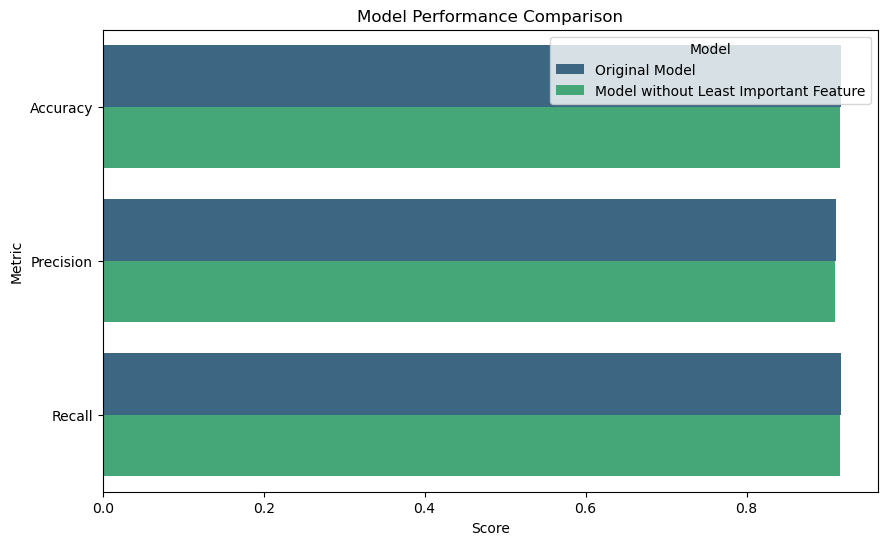

In [91]:
# Create a DataFrame for visualization
metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Original Model': [
        accuracy_score(y, original_predictions),
        precision_score(y, original_predictions, average='weighted'),
        recall_score(y, original_predictions, average='weighted')
    ],
    'Model without Least Important Feature': [
        accuracy_score(y_removed_feature, removed_feature_predictions),
        precision_score(y_removed_feature, removed_feature_predictions, average='weighted'),
        recall_score(y_removed_feature, removed_feature_predictions, average='weighted')
    ]
})

# Melt the DataFrame for easier plotting
metrics_melted = pd.melt(metrics_df, id_vars='Metric', var_name='Model', value_name='Score')

# Plot using Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Score', y='Metric', hue='Model', data=metrics_melted, palette='viridis')
plt.title('Model Performance Comparison')
plt.xlabel('Score')

plt.show()